In [175]:
import pandas as pd
from toxic_funcs import Cleaner

df = pd.read_csv('train.csv')

clean_comments = []
for comment in df.comment_text.values:
    clean_comments.append(Cleaner(comment))
    
df.comment_text = clean_comments

df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation. why the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww. he matches this background colour im se...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying to edit war. its ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,. more. i cant make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero. any chance you remember w...,0,0,0,0,0,0


In [176]:
labels=['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']

toxic


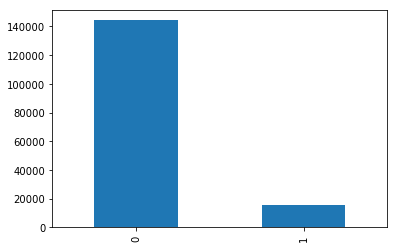

------
severe_toxic


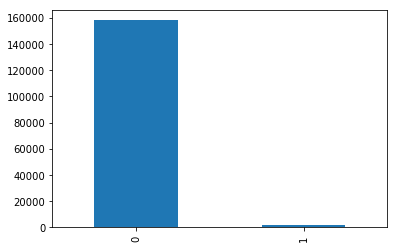

------
obscene


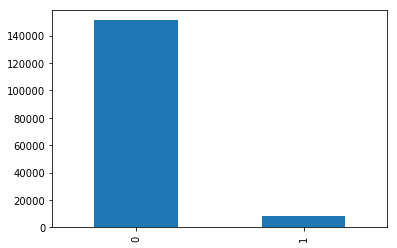

------
threat


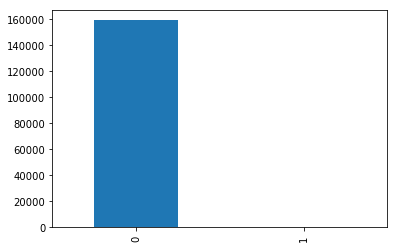

------
insult


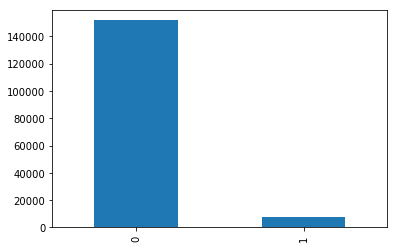

------
identity_hate


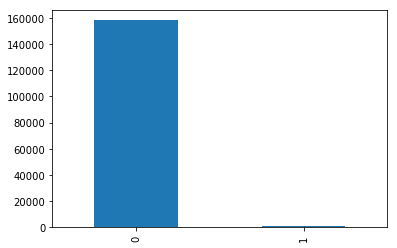

------


In [177]:
import matplotlib.pyplot as plt
for label in labels:
    print(label)
    df[label].value_counts().plot(kind = 'bar')
    plt.show()
    print("------")

In [178]:
from toxic_Words2 import toxicWords
toxic_wordsSW = toxicWords(df)
len(toxic_wordsSW)

496581

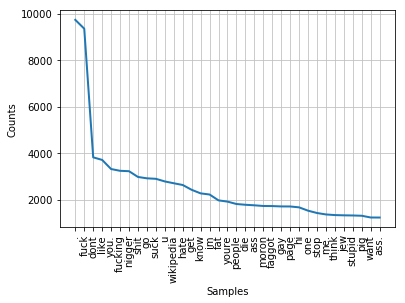

In [181]:
%matplotlib inline
# plot word req
from wordFreqDist2 import wordFreqDist
freqWordist = wordFreqDist(35, toxic_wordsSW)

In [182]:
from wordFreqFilter import wordFreqFilter
wordsF = wordFreqFilter(35, freqWordist)
len(wordsF)


Number of words: 
1857


1857

In [ ]:
# part 2 the data 

In [183]:
from makeToxicFeatures2 import makeToxicFeatures
dfF=makeToxicFeatures(df, wordsF)
dfF.head()

Number of Data Rows:
159571
Type the 1st Row:
<class 'str'>
-------
Number of Data Words Lists:
159571
Data 1st Row:
['explanation.', 'why', 'the', 'edits', 'made', 'under', 'my', 'username', 'hardcore', 'metallica', 'fan', 'were', 'reverted.', 'they', 'werent', 'vandalisms', 'just', 'closure', 'on', 'some', 'gas', 'after', 'i', 'voted', 'at', 'new', 'york', 'dolls', 'fac.', 'and', 'please', 'dont', 'remove', 'the', 'template', 'from', 'the', 'talk', 'page', 'since', 'im', 'retired', 'now.']
-------
----
Data Words Lists:
159571
Data 1st Row without SW:
['explanation.', 'edits', 'made', 'username', 'hardcore', 'metallica', 'fan', 'reverted.', 'werent', 'vandalisms', 'closure', 'gas', 'voted', 'new', 'york', 'dolls', 'fac.', 'please', 'dont', 'remove', 'template', 'talk', 'page', 'since', 'im', 'retired', 'now.']
----
----
1857
1857
1857
Above Nums should be same! are they?
----


,0,1,2,3,4,5,6,7,8,9,...,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
dfF.shape

(159571, 1857)

In [204]:
df = pd.read_csv('trainC.csv')
df.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,Compound,Negative,Positive,Neutral,NumC,NumL,Caps
0,0000997932d777bf,0,0,0,0,0,0,0.5574,0.000,0.103,0.897,17,222,0.076577
1,000103f0d9cfb60f,0,0,0,0,0,0,0.2942,0.099,0.158,0.743,8,95,0.084211
2,000113f07ec002fd,0,0,0,0,0,0,-0.1779,0.083,0.068,0.849,4,192,0.020833
3,0001b41b1c6bb37e,0,0,0,0,0,0,0.5106,0.022,0.062,0.916,11,507,0.021696
4,0001d958c54c6e35,0,0,0,0,0,0,0.6808,0.000,0.337,0.663,2,55,0.036364


In [205]:
df.shape

(159571, 14)

In [206]:
dfF.shape

(159571, 1857)

In [207]:
df = df.join(pd.DataFrame(dfF))
df.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,Compound,Negative,Positive,...,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856
0,0000997932d777bf,0,0,0,0,0,0,0.5574,0.000,0.103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,0,0,0,0,0,0,0.2942,0.099,0.158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,0,0,0,0,0,0,-0.1779,0.083,0.068,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,0,0,0,0,0,0,0.5106,0.022,0.062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,0,0,0,0,0,0,0.6808,0.000,0.337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
y=df[labels]
X=df.drop(labels +['id', 'NumC', 'NumL', 'Positive'],axis=1)

In [209]:
X.head()

,Compound,Negative,Neutral,Caps,0,1,2,3,4,5,...,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856
0,0.5574,0.000,0.897,0.076577,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2942,0.099,0.743,0.084211,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.1779,0.083,0.849,0.020833,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5106,0.022,0.916,0.021696,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.6808,0.000,0.663,0.036364,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [211]:
y.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [212]:
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense

In [213]:
import numpy as np
ynp=np.array(y)

In [214]:
ynp[:10]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [106]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, ynp, random_state=1, stratify=y)

In [216]:
input_dim = X.shape[1]
toxic_model = Sequential()


toxic_model.add(Dense(300, activation='relu', input_dim=input_dim))
toxic_model.add(Dense(100, activation='relu'))
toxic_model.add(Dense(50, activation='relu'))

toxic_model.add(Dense(units=6, activation='sigmoid'))

toxic_model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

toxic_model.summary()

toxic_model.fit(
    X,
    ynp,
    epochs=5,
    shuffle=True,
    verbose=2,
    validation_split=0.4
)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 300)               558600    
_________________________________________________________________
dense_32 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_33 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_34 (Dense)             (None, 6)                 306       
Total params: 594,056
Trainable params: 594,056
Non-trainable params: 0
_________________________________________________________________
Train on 95742 samples, validate on 63829 samples
Epoch 1/5
 - 66s - loss: 0.0747 - acc: 0.9773 - val_loss: 0.0610 - val_acc: 0.9804
Epoch 2/5
 - 68s - loss: 0.0529 - acc: 0.9822 - val_loss: 0.0588 - val_acc: 0.9811
Epoch 3/5
 - 74s - loss: 0.0410 - acc: 0.9859 - val_

In [305]:
# Save the model
toxic_model.save("toxic_model_trained.h5")

In [ ]:
# Applying model to Kagell Test Data 

In [217]:
df = pd.read_csv('test.csv')

clean_comments = []
for comment in df.comment_text.values:
    clean_comments.append(Cleaner(comment))
    
df.comment_text = clean_comments

df.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule is more succesful then youll ...
1,0000247867823ef7,from rfc . the title is fine as it is ...
2,00013b17ad220c46,. sources . * zawe ashton on laplan...
3,00017563c3f7919a,:if you have a look back at the source the inf...
4,00017695ad8997eb,i dont anonymously edit articles at all.


In [218]:
df.shape

(153164, 2)

In [219]:
len(wordsF)

1857

In [220]:
dfF=makeToxicFeatures(df, wordsF)
dfF.head()

Number of Data Rows:
153164
Type the 1st Row:
<class 'str'>
-------
Number of Data Words Lists:
153164
Data 1st Row:
['yo', 'bitch', 'ja', 'rule', 'is', 'more', 'succesful', 'then', 'youll', 'ever', 'be', 'whats', 'up', 'with', 'you', 'and', 'hating', 'you', 'sad', 'mofuckas.', 'i', 'should', 'bitch', 'slap', 'ur', 'pethedic', 'white', 'faces', 'and', 'get', 'you', 'to', 'kiss', 'my', 'ass', 'you', 'guys', 'sicken', 'me.', 'ja', 'rule', 'is', 'about', 'pride', 'in', 'da', 'music', 'man.', 'dont', 'diss', 'that', 'shit', 'on', 'him.', 'and', 'nothin', 'is', 'wrong', 'bein', 'like', 'tupac', 'he', 'was', 'a', 'brother', 'too.', 'fuckin', 'white', 'boys', 'get', 'things', 'right', 'next', 'time.']
-------
----
Data Words Lists:
153164
Data 1st Row without SW:
['yo', 'bitch', 'ja', 'rule', 'succesful', 'youll', 'ever', 'whats', 'hating', 'sad', 'mofuckas.', 'bitch', 'slap', 'ur', 'pethedic', 'white', 'faces', 'get', 'kiss', 'ass', 'guys', 'sicken', 'me.', 'ja', 'rule', 'pride', 'da', 'musi

,0,1,2,3,4,5,6,7,8,9,...,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
df = pd.read_csv('testC.csv')
#df = df[['toxic', 'Compound', 'Caps', 'Negative', 'Positive', 'Neutral']]
df = df[['id','Compound', 'Caps', 'Negative', 'Neutral']]
df.head()

,id,Compound,Caps,Negative,Neutral
0,00001cee341fdb12,-0.9228,0.013514,0.248,0.623
1,0000247867823ef7,0.2023,0.194444,0.000,0.859
2,00013b17ad220c46,0.0000,0.114286,0.000,1.000
3,00017563c3f7919a,0.5023,0.023810,0.000,0.910
4,00017695ad8997eb,0.0000,0.028571,0.000,1.000


In [222]:
df = df.join(pd.DataFrame(dfF))
df.head()

,id,Compound,Caps,Negative,Neutral,0,1,2,3,4,...,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856
0,00001cee341fdb12,-0.9228,0.013514,0.248,0.623,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000247867823ef7,0.2023,0.194444,0.000,0.859,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00013b17ad220c46,0.0000,0.114286,0.000,1.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00017563c3f7919a,0.5023,0.023810,0.000,0.910,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00017695ad8997eb,0.0000,0.028571,0.000,1.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [223]:
X_test=df.drop('id', axis=1)
X_test.head()

,Compound,Caps,Negative,Neutral,0,1,2,3,4,5,...,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856
0,-0.9228,0.013514,0.248,0.623,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2023,0.194444,0.000,0.859,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0000,0.114286,0.000,1.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5023,0.023810,0.000,0.910,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0000,0.028571,0.000,1.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [184]:
target

'toxic'

In [224]:
toxicPred = toxic_model.predict(X_test)

In [225]:
toxicPred

array([[9.9999714e-01, 4.3201336e-01, 9.9960631e-01, 1.2166468e-02,
        9.9870658e-01, 9.2091507e-01],
       [2.4999700e-02, 2.9069828e-04, 8.2394835e-03, 1.3373858e-04,
        8.5572787e-03, 1.3330170e-03],
       [8.3544648e-01, 1.4326559e-01, 2.6019874e-01, 2.0825076e-01,
        5.2330709e-01, 2.1903212e-01],
       ...,
       [1.6419392e-04, 1.5322524e-07, 4.6468325e-05, 1.2893699e-06,
        1.4786257e-05, 4.7959311e-06],
       [6.6911511e-04, 3.8111721e-05, 3.0997456e-03, 3.4070824e-04,
        4.6663405e-03, 1.6741965e-02],
       [9.9641418e-01, 2.8882226e-02, 9.8164910e-01, 1.3198685e-04,
        7.6105350e-01, 1.9470527e-03]], dtype=float32)

In [230]:
toxicPredDf  =  (pd.DataFrame(toxicPred) > .49999) * 1
toxicPredDf.columns = labels
toxicPredDf.head()
toxicPredDf['id'] = df['id']
toxicPredDf = toxicPredDf[['id']+labels]
toxicPredDf.head(50)



,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,1,0,1,0,1,1
1,0000247867823ef7,0,0,0,0,0,0
2,00013b17ad220c46,1,0,0,0,1,0
3,00017563c3f7919a,1,0,0,0,0,0
4,00017695ad8997eb,1,0,0,0,0,0
5,0001ea8717f6de06,0,0,0,0,0,0
6,00024115d4cbde0f,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0
8,00025358d4737918,0,0,0,0,0,0
9,00026d1092fe71cc,0,0,0,0,0,0


In [231]:
toxicPredDf.shape

(153164, 7)

In [232]:
toxicPredDf.to_csv('toxicPredDf4.csv', index=False)

In [233]:
pd.read_csv('toxicPredDf4.csv').head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,1,0,1,0,1,1
1,0000247867823ef7,0,0,0,0,0,0
2,00013b17ad220c46,1,0,0,0,1,0
3,00017563c3f7919a,1,0,0,0,0,0
4,00017695ad8997eb,1,0,0,0,0,0


In [299]:
labels

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
test = 'test test, test test, hellow hai'

In [309]:
text=input(print("Text:"))

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
from sentimentAnalyzer3 import sentimentAnalyzer # 1 
dFCom1=pd.DataFrame([text]).reset_index()
dFCom1.columns = ['id','comment_text']
dFCom1 = sentimentAnalyzer(dFCom1)[['Compound', 'Caps', 'Negative', 'Neutral']]
print(dFCom1)

wordsF2 = pd.read_csv('wordsF.csv')['0'].tolist()
print(len(wordsF2))


from toxic_funcs import Cleaner # 2
dfComm = pd.DataFrame([Cleaner(text)])
dfComm.columns = ['comment_text']
print(dfComm)

from makeToxicFeatures2 import makeToxicFeatures
dfComm=makeToxicFeatures(dfComm, wordsF2)
dfComm.head()


X_Text = dFCom1.join(pd.DataFrame(dfComm))
X_Text.head()


# Load the model
from keras.models import load_model
Toxic_model = load_model("toxic_model_trained.h5")

text_Pred = Toxic_model.predict(X_Text)
text_Pred

TPred = (pd.DataFrame(text_Pred) > .49999) * 1
TPred.columns = labels
TPred


Text:
NoneHi There you are not very good you are bad
   Compound      Caps  Negative  Neutral
0   -0.7288  0.060606     0.434    0.566
1857
                                 comment_text
0  hi there you are not very good you are bad
Number of Data Rows:
1
Type the 1st Row:
<class 'str'>
-------
Number of Data Words Lists:
1
Data 1st Row:
['hi', 'there', 'you', 'are', 'not', 'very', 'good', 'you', 'are', 'bad']
-------
----
Data Words Lists:
1
Data 1st Row without SW:
['hi', 'good', 'bad']
----
----
1857
1857
1857
Above Nums should be same! are they?
----


,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
